# Explore here

In [16]:
# Your code here

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import xgboost
from xgboost import XGBModel
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.inspection import partial_dependence

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Model 1. In this model I begin without any data imputation. ##

In [8]:
X,y = df.drop('Outcome',axis=1),df['Outcome']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)


In [9]:
m1 = GradientBoostingClassifier(random_state=42,n_estimators=10)
m1.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=10, random_state=42)

In [11]:
y1_pred = m1.predict(X_test)
accuracy_score(y1_pred,y_test)

0.7792207792207793

In [12]:
m2 = GradientBoostingClassifier(random_state=42,n_estimators=50)
m2.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=50, random_state=42)

In [14]:
y2_pred = m2.predict(X_test)
accuracy_score(y2_pred,y_test)

0.7662337662337663

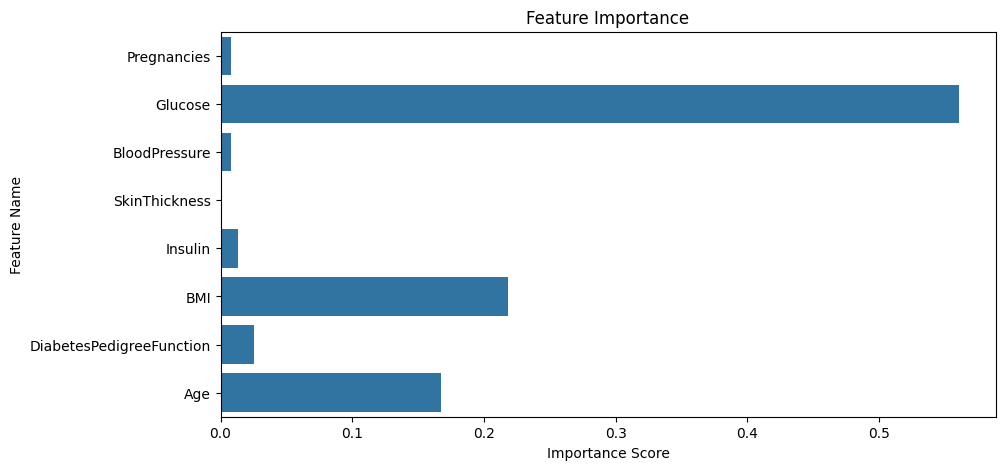

In [17]:
# Feature Importance 

feature_importance = m1.feature_importances_
plt.figure(figsize=(10,5))
sns.barplot(x=feature_importance,y=X.columns)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.show()

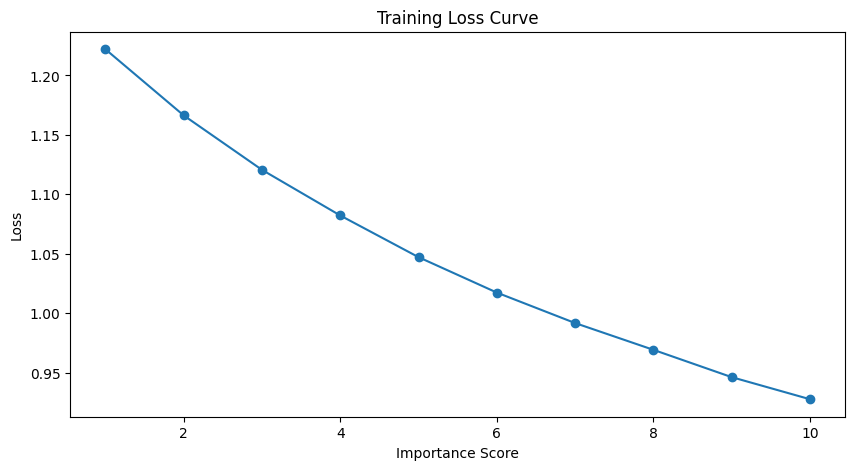

In [18]:
# Training Loss Curve 

plt.figure(figsize=(10,5))
plt.plot(np.arange(1,len(m1.train_score_)+1),m1.train_score_,marker='o')
plt.title("Training Loss Curve")
plt.xlabel("Importance Score")
plt.ylabel("Loss")
plt.show()

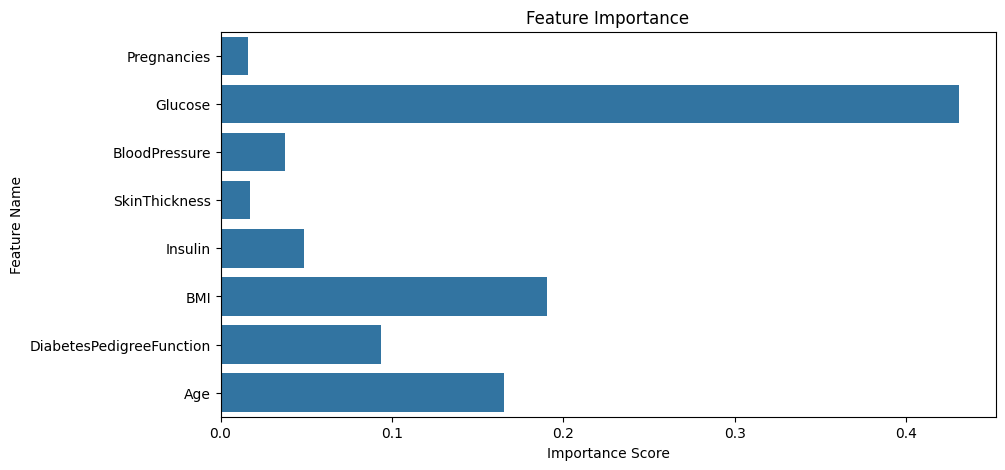

In [19]:
feature_importance = m2.feature_importances_
plt.figure(figsize=(10,5))
sns.barplot(x=feature_importance,y=X.columns)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.show()

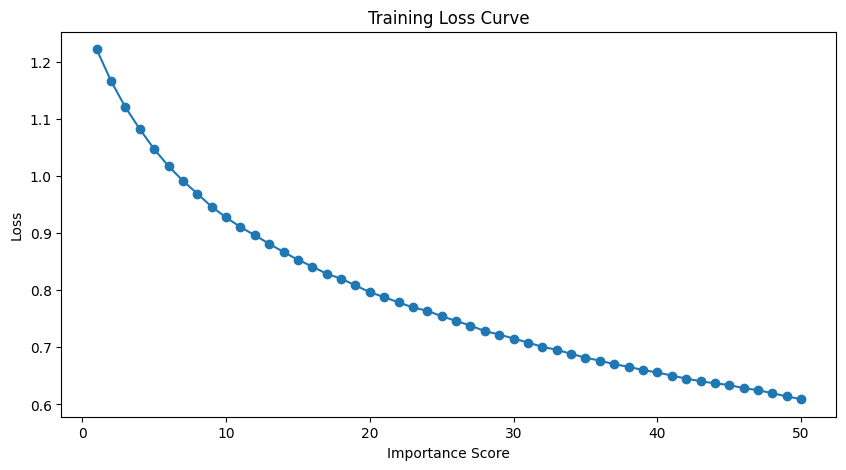

In [20]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(1,len(m2.train_score_)+1),m2.train_score_,marker='o')
plt.title("Training Loss Curve")
plt.xlabel("Importance Score")
plt.ylabel("Loss")
plt.show()